In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
# 
df = pd.read_csv('cleaned.csv')
df.head()

,Country,Year,Exports_USD,GDP_USD,High_Tech_Exports_USD,Imports_USD,Industry_Value_Added_USD,Labor_Force,Military_Exp_USD,Population,Researchers_per_Million,Unemployment_Rate,Trade_Balance_USD,GDP_per_Capita_USD,Trade_GDP_Ratio,Number_of_Unemployed
0,Argentina,1999,2.786230e+10,2.835230e+11,7.709377e+10,3.276270e+10,7.426497e+10,16410324,3.461731e+09,36653031,713.571045,14.05,-4.900400e+09,7735.32,85.04,5149751
1,Argentina,1999,3.122369e+10,2.842038e+11,7.709377e+10,3.307015e+10,7.386693e+10,16588444,3.266633e+09,37070774,716.688354,15.00,-1.846456e+09,7666.52,94.42,5560616
2,Argentina,1999,3.111242e+10,2.686968e+11,7.709377e+10,2.760388e+10,6.782829e+10,16651214,3.183592e+09,37480493,688.242737,17.32,3.508537e+09,7168.98,112.71,6491621
3,Argentina,1999,2.773661e+10,9.772400e+10,7.709377e+10,1.306582e+10,2.986224e+10,16491672,1.114172e+09,37885028,692.160828,19.59,1.467079e+10,2579.49,212.28,7421677
4,Argentina,1999,3.308451e+10,1.275870e+11,7.709377e+10,1.877290e+10,4.165089e+10,16951795,1.374874e+09,38278164,718.546326,15.36,1.431161e+10,3333.15,176.24,5879526


In [141]:
# define the target variable
y = df.GDP_per_Capita_USD

# define the features
X = df.drop(['GDP_USD','GDP_per_Capita_USD', 'Country', 'Year'], axis=1)

# ouput 
print('Target variable: ', y.shape)
print('Features: ', X.shape)

Target variable:  (450,)
Features:  (450, 12)


In [142]:
# Convert columns to rounded numbers
X = X.applymap(lambda x: round(x))
y = y.apply(lambda x: round(x))


/tmp/ipykernel_11733/1185454173.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: round(x))


In [99]:
y.head()

0    7735
1    7667
2    7169
3    2579
4    3333
Name: GDP_per_Capita_USD, dtype: int64

In [131]:

from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [132]:
# display the results of the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((360, 12), (90, 12), (360,), (90,))

In [152]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.metrics import root_mean_squared_error, r2_score

## Linear Regression

In [153]:
# Train the model 
linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

# make precdictions
linear_pred = linear_reg.predict(X_test)

In [135]:
linear_r2 = r2_score(y_test, linear_pred)
linear_rmse = root_mean_squared_error(y_test, linear_pred)

print('rmse: ', linear_rmse)
print('r_square: ', linear_r2)

rmse:  8790.555660061276
r_square:  0.8287186025961535


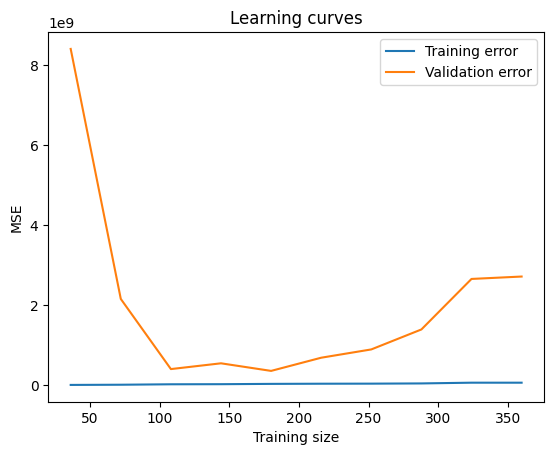

In [136]:
# Learning curve
train_sizes, train_scores, test_scores = learning_curve(linear_reg, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.ylabel('MSE')
plt.xlabel('Training size')
plt.title('Learning curves')
plt.legend()
plt.show()

In [146]:
# # Plotting linear_pred vs y_test
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, linear_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Linear Regression: Predicted vs Actual')
# plt.legend()
# plt.grid(True)
# plt.show()

## Lasso 

In [150]:
# Build a Lasso regression model
lasso_reg = Lasso()

# Train the model
lasso_reg.fit(X_train, y_train)

# Make predictions
lasso_pred = lasso_reg.predict(X_test)

# Evaluate the model
lasso_rmse = root_mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

# output result
print(f'root_mean_squared_error: {lasso_rmse}')
print(f'root square: {lasso_r2}')

root_mean_squared_error: 8784.084032672683
root square: 0.8289707052837616


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.193e+10, tolerance: 1.161e+07
  model = cd_fast.enet_coordinate_descent(


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.661e+06, tolerance: 5.025e+04
  model = cd_fast.enet_coordinate_descent(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.608e+08, tolerance: 1.066e+06
  model = cd_fast.enet_coordinate_descent(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

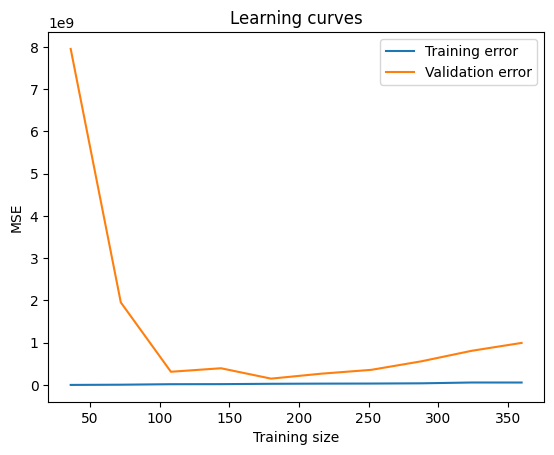

In [151]:
train_sizes, train_scores, test_scores = learning_curve(lasso_reg, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.ylabel('MSE')
plt.xlabel('Training size')
plt.title('Learning curves')
plt.legend()
plt.show()

In [147]:
# # Plotting y_pred vs y_test
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, lasso_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Lasso Regression: Predicted vs Actual')
# plt.legend()
# plt.grid(True)
# plt.show()

## ElasticNet Model

In [112]:
# Train the model 
elastic_net_reg = ElasticNet()

elastic_net_reg.fit(X_train, y_train)

# make predictions
elastic_net_pred = elastic_net_reg.predict(X_test)

# Evaluate the model
elastic_net_rmse = root_mean_squared_error(y_test, elastic_net_pred)
elastic_net_r2 = r2_score(y_test, elastic_net_pred)

# output result
print(f'root_mean_squared_error: {elastic_net_rmse}')
print(f'root square: {elastic_net_r2}')

root_mean_squared_error: 8766.32512241185
root square: 0.8107574043810757


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.025e+10, tolerance: 1.022e+07
  model = cd_fast.enet_coordinate_descent(


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.711e+06, tolerance: 5.025e+04
  model = cd_fast.enet_coordinate_descent(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.613e+08, tolerance: 1.066e+06
  model = cd_fast.enet_coordinate_descent(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

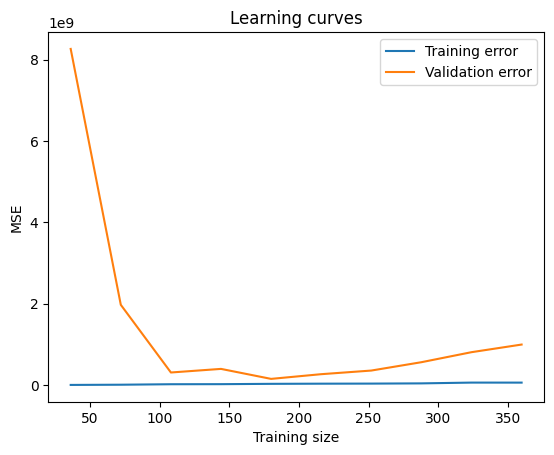

In [148]:
train_sizes, train_scores, test_scores = learning_curve(elastic_net_reg, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.ylabel('MSE')
plt.xlabel('Training size')
plt.title('Learning curves')
plt.legend()
plt.show()

In [121]:
# # Plotting elastic_net_pred vs y_test
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, elastic_net_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Elastic Net Regression: Predicted vs Actual')
# plt.legend()
# plt.grid(True)
# plt.show()

In [115]:
# Create a DataFrame with the evaluation metrics
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'ElasticNet Regression'],
    'Mean Squared Error': [linear_rmse, lasso_rmse, elastic_net_rmse],
    'R^2 Score': [linear_r2, lasso_r2, elastic_net_r2]
})

In [116]:
results

,Model,Mean Squared Error,R^2 Score
0,Linear Regression,8880.893544,0.805779
1,Lasso Regression,8761.156774,0.810980
2,ElasticNet Regression,8766.325122,0.810757


In [155]:
# create a new df based on the original df
# by reducing the number of features that have the highest correlation each other

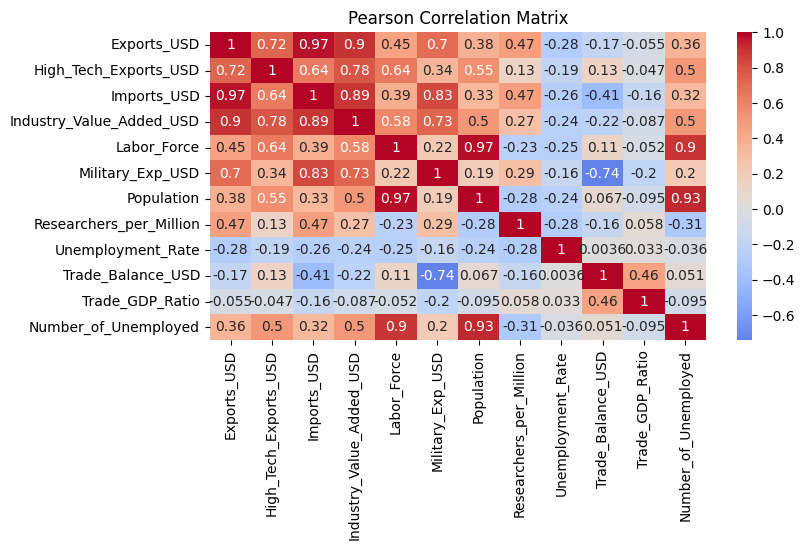

In [156]:
# Calculate the correlation matrix
pearson_corr = X.corr(method='pearson')

# Visualizing the Pearson correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Matrix')
plt.show()

In [157]:
X.columns

Index(['Exports_USD', 'High_Tech_Exports_USD', 'Imports_USD',
       'Industry_Value_Added_USD', 'Labor_Force', 'Military_Exp_USD',
       'Population', 'Researchers_per_Million', 'Unemployment_Rate',
       'Trade_Balance_USD', 'Trade_GDP_Ratio', 'Number_of_Unemployed'],
      dtype='object')

In [164]:
X1 = X[['Exports_USD', 'Number_of_Unemployed', 'Military_Exp_USD', 
       'Researchers_per_Million', 'High_Tech_Exports_USD', 'Researchers_per_Million', 'Trade_Balance_USD',
        'Trade_GDP_Ratio']]

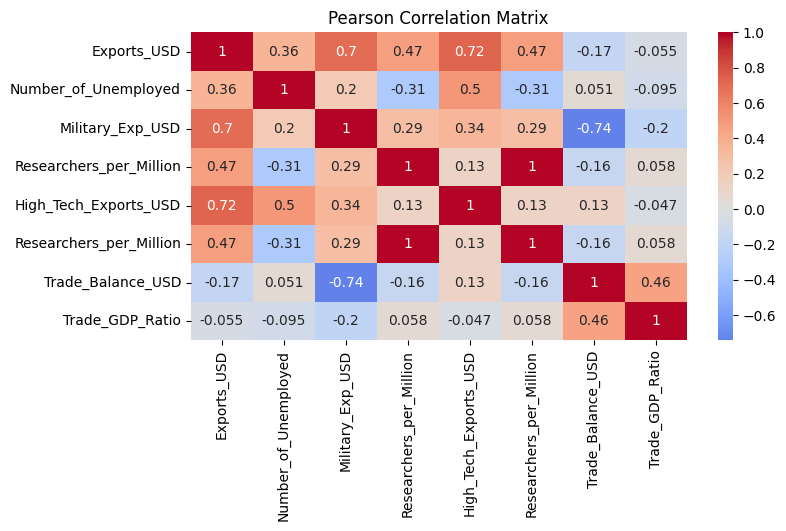

In [165]:
# Calculate the correlation matrix
pearson_corr = X1.corr(method='pearson')

# Visualizing the Pearson correlation matrix
plt.figure(figsize=(8, 4))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Matrix')
plt.show()

In [169]:
# split the data
X_train_, X_test_, y_train_, y_test_ = train_test_split(
    X1, y_, test_size=0.2, random_state=42
)

# Train the model 
linear_reg_ = LinearRegression()

linear_reg_.fit(X_train_, y_train_)

# make precdictions
linear_pred_ = linear_reg_.predict(X_test_)

linear_r2_ = r2_score(y_test_, linear_pred_)
linear_rmse_ = root_mean_squared_error(y_test_, linear_pred_)

print('rmse: ', linear_rmse_)
print('r_square: ', linear_r2_)

NameError: name 'y_' is not defined

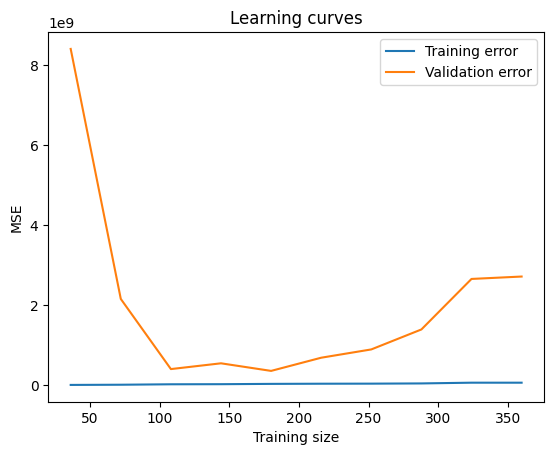

In [168]:
# Learning curve
train_sizes, train_scores, test_scores_ = learning_curve(linear_reg_, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean_ = -train_scores.mean(axis=1)
test_scores_mean_ = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean_, label='Training error')
plt.plot(train_sizes, test_scores_mean_, label='Validation error')
plt.ylabel('MSE')
plt.xlabel('Training size')
plt.title('Learning curves')
plt.legend()
plt.show()

In [110]:
#FYI: use the mean values of y_predic to determine if the model is performinf well
#print('mean of predic:', y_pred.mean())